# **I-Importing data**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

epsilon=0.0001 #for convergence criteria


d0 = pd.read_csv('train_data.csv') #(taken from online tutorial)
print(d0.head(5)) 
l = d0['label']
d = d0.drop("label",axis=1)
print(d.shape)
print(l.shape)

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)







Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks
   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
(42000, 784)
(42000,)
the shape of sample data =  (15000, 784)


# **II- Showing example of sample data** **texte en gras**

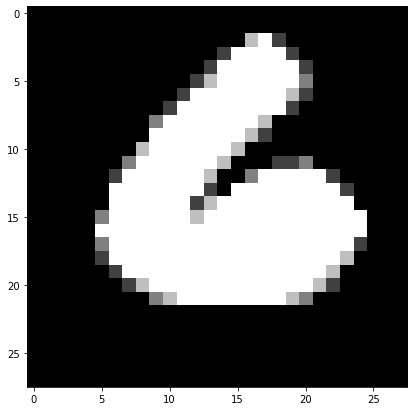

6


In [ ]:

# show example of sample (taken from online tutorial)
plt.figure(figsize=(7,7))
idx = 500
grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])


# **III- Iterative SVD for Principal Components**

In [ ]:



def iteration(A,index,first_component):
    v_iteration=np.random.rand(A.shape[0],1)#filling with random values
    shape_A=A.shape

    if index!=0:
        for i in range(shape_A[1]):
            A[:,i]=A[:,i]-first_component*np.dot(A[:,i],first_component) #substract contribution of the last principal component
    

    converged=False

    while(converged==False):
        v_iteration_copy=v_iteration.copy()
        v_iteration=v_iteration/np.linalg.norm(v_iteration)

        u_i=[]
        for i in range(shape_A[1]):
            u_i.append(np.dot(A[:,i],v_iteration))

        sum_u_i_x_i=0
        sum_ui=0

        for i in range(shape_A[1]) :
            sum_u_i_x_i+=A[:,i]*u_i[i]
            sum_ui+=u_i[i]**2
        v_iteration=sum_u_i_x_i/sum_ui
        if(np.linalg.norm(v_iteration_copy-v_iteration)<=epsilon):
            converged=True

    return v_iteration

def iterative_svd(X,nbr_components):
    A=np.matmul(X.transpose(),X)#compute the covariance matrix
    if nbr_components<=min(A.shape[0],A.shape[1]):
        v1=np.random.rand(A.shape[0],1)#filling with random values
        first_component=v1
        v_i=[]
        for index in range(nbr_components):
            element= iteration(A,index,first_component)
            if index==0:
                first_component=element
            else:
                first_component=v_i[index-1]
            
            v_i.append(element)

        V=np.array(v_i)
        return V
    else:
        print("the number of components should be equal or less  than  min(dim_features,dim_samples)")
        return []
        




# **IV-Data scaling**

In [ ]:
def scale_matrix(A):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(A)
    A=scaler.transform(A)
    return A


def data_scaling(data):
    from sklearn.preprocessing import StandardScaler
    standardized_data = StandardScaler().fit_transform(data)
    print("standardized data shape=",standardized_data.shape)
    return standardized_data




# **V-Data projection & visualization**

In [ ]:


# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt

def project_data_on_components(principal_components):
    new_coordinates = np.matmul(principal_components, sample_data.T)#z=Ut.x
    return new_coordinates


def data_visualize(coordinates):

    import pandas as pd
    import seaborn as sn

    coordinates = np.vstack((coordinates, labels)).T#Add labels to the vector 
    dataframe = pd.DataFrame(data=coordinates, columns=("1st_principal", "2nd_principal", "label"))
    print(dataframe.head())
    sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()


# **VI- Performing data scaling**

In [ ]:


#I-Data scaling
standardized_data=data_scaling(data)
sample_data = standardized_data


standardized data shape= (15000, 784)


# **VII-Performing PCA with Sklearn**

(15000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of pca_reduced.shape =  (15000, 4)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


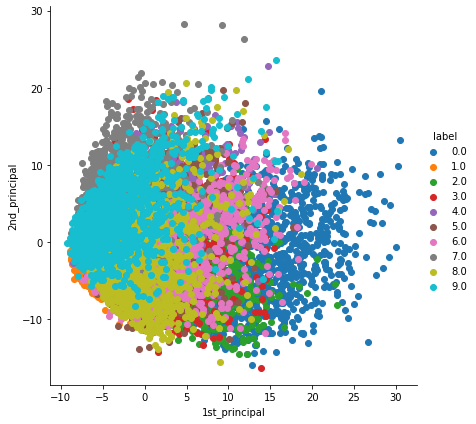

In [ ]:
''
#comparaison avec sklearn 

# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 4
print(sample_data.shape)
print(standardized_data)
pca_data = pca.fit_transform(standardized_data)
print("shape of pca_reduced.shape = ", pca_data.shape)




# Visualizing PCA from Sklearn
pca_data = np.vstack((pca_data[:,0:2].T, labels)).T
import seaborn as sn
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()





## **VIII-PCA performed using iterative SVD method**

(2, 784)
   1st_principal  2nd_principal  label
0      -5.044097      -5.560317    1.0
1      19.305869       6.190957    0.0
2      -7.678963      -1.910556    1.0
3      -0.464320       5.524191    4.0
4      26.644898       6.363370    0.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


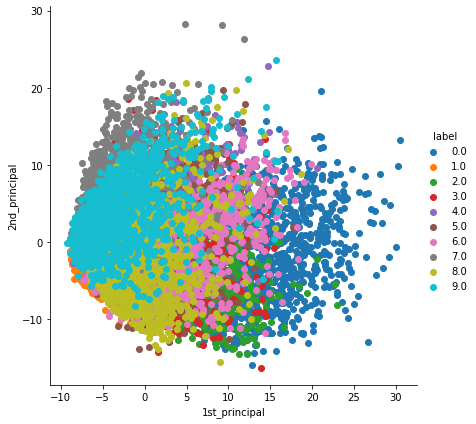

In [ ]:
components=iterative_svd(sample_data,2)
print(components.shape)

#III-projection of original data on the PC
projection_coordinates=project_data_on_components(components)
#IV-Data Visualization of projection
data_visualize(projection_coordinates)

# **Generalize SVD in case of moderate missing values [KyungHyun Cho and Nima Reyhani] (does not converge)**

In [2]:
'''
Algorithm 1 The iterative algorithm for computing SVD.
Input an input matrix Xm×n, a set of observed indices Ω,
a rank-update interval nr
Initialize Um×r, Vn×r and Ym×n to some small random
values where r < min(m, n) is a small integer.
Orthogonalize U and V according to (5)
Compute S according to (8)
Set n = 0
repeat
Update U and V according to (6) and (7)
Update S according to (8)
Make all sii positive according to Section II-B
Update Y according to (9).
if mod (n, nr) = 0 and (10) is false then
Append a set of random column vectors to U and V
Orthogonalize U and V
Update S
Make all sii positive
end if
until Stopping criterion is reached
'''
import scipy as sp
import numpy as np
from scipy import linalg

eta=2


def turn_mat_positive(M):
    M = np.maximum(M, -M) 

    return M#Have to check it later idk


def s_computing(U,Y,V):#OK
   
    U_t=U.transpose()
    interm=np.matmul(U_t,Y)
    S=np.matmul(interm,V)
    return S
    
def normalize(v):
    return v/np.sqrt(v.dot(v))

def orthogolize_schmidt(A):
    n = min(A.shape[0],A.shape[1])
    print(A.shape)
    A[:, 0] = normalize(A[:, 0])

    for i in range(1, n):
        Ai = A[:, i]
        for j in range(0, i):
            Aj = A[:, j]
            t = Ai.dot(Aj)
            Ai = Ai - t * Aj
        A[:, i] = normalize(Ai)
    print("shape A=",A.shape)
    return A



def retraction_QR(mat):#We need to check this

    Q,R= linalg.qr(mat)

    return Q



import numpy as np
import random




def initialize(m,n):
    my_min=min(m,n)#il faut qu'il soit inférieur au min
    U=np.random.rand(m, my_min)#filling with random values
    V=np.random.rand(n, my_min)
    Y=np.zeros((m,n))#init 
    #filling the diagonal
    vec=np.random.rand(my_min)
    for i in range(my_min):
        Y[i,i]=vec[i]
    print("shape of U is",U.shape)
    print("shape of V is",V.shape)
    return U,Y,V


def update_U_V(U,V,Y,eta,S):
    Y_V=(np.matmul(Y,V))
    U_V_T=np.matmul(U,V.transpose())
    Y_T_U=np.matmul(Y.transpose(),U)
    V_U_T=np.matmul(V,U.transpose())

    
    U=U+eta*(Y_V+np.matmul(np.matmul(U_V_T,Y_T_U),S))
    V=V+eta*(Y_T_U+np.matmul(np.matmul(V_U_T,Y_V),S))
    return U,V


def update_Y(Y,lbda,U,S,X,V):
    #full set observed
    omega_set=set()
    for i in range((X-Y).shape[0]):
        for j in range((X-Y).shape[1]):
            omega_set.add((i,j))

    U_S=np.matmul(U,S)
    Y=Y+eta*(np.matmul(U_S,V.transpose())-Y+lbda*omega_matrix(X-Y,omega_set))
    return Y


def omega_matrix(Z,omega_set):
    omega_mat=np.zeros((Z.shape[0],Z.shape[1]))
    index_i=[i for i in range(Z.shape[0])]
    index_j=[j for j in range(Z.shape[1])]

    for i,j in zip(index_i,index_j):
        if (i,j) in omega_set:
            omega_mat[i,j]=Z[i,j]
        else:
            omega_mat[i,j]=0
    
    return omega_mat



def error_missing_values(X,Y,omega_set):
    print("Omega matrix=",omega_matrix(X-Y,omega_set))
    the_error=linalg.norm((omega_matrix(X-Y,omega_set))/linalg.norm(omega_matrix(X,omega_set)))**2
    print("error from missing_values=",the_error)
    return the_error


def check_sum_sv(K,k,lbdas,tau):
    sum_lbdas=np.sum(lbdas)
    K=len(lbdas)
    if (sum_lbdas/(sum_lbdas+(K-k)*lbdas[k])>tau):
        return True
    else:
        return False

def SVD_algorithm(matrix,m,n,n_r):
    iteration=0
    lbda=1
    m=7
    n=3
    U,Y,V=initialize(m,n)
    eta=0.05
    K=2
    k=1
    tau=0.5
    print('Y=',Y)
    U=orthogolize_schmidt(U)
    V=orthogolize_schmidt(V)
    epsilon=0.1
    print("shape of U after retraction=",U.shape)
    print("shape of V after retraction=",V.shape)

    omega_set=set()
    for i in range((X-Y).shape[0]):
        for j in range((X-Y).shape[1]):
            omega_set.add((i,j))
    S=s_computing(U,Y,V)    
    N=0
    error=2

    while error>epsilon:
        error=abs(error_missing_values(X,Y,omega_set)-error)

        print("error=",error)
        U,V=update_U_V(U,V,Y,eta,S)#OK
        #U=orthogolize_schmidt(U)
        #V=orthogolize_schmidt(V)#We need to check this
        S=s_computing(U,Y,V)#OK
        S=turn_mat_positive(S)#OK but need to check the algorithm
        Y=update_Y(Y,lbda,U,S,matrix,V)
        iteration=iteration+1
        #lambda should be determined based on the portion o the size of missing values
        #Update Y according to (9)
        lbdas=np.diag(Y)
        if N%n_r==0 and  check_sum_sv(K,k,lbdas,tau)==True:#lbdas= the sum of singular values estimated so fa
            #Append a set of random column vectors to U and V
            print("hh")
            U=orthogolize_schmidt(U)
            V=orthogolize_schmidt(V)#We need to check this
            S=s_computing(U,Y,V)#OK
            S=turn_mat_positive(S)#OK but need to check the algorithm

    return U,Y,S,V

m=7
n=3
X=np.random.rand(m, n)

U,Y,S,V=SVD_algorithm(X,4,3,1)

print("U=",U)
print("Y=",Y)
print("V=",Y)
print('S=',S)

print('produit matrices=',np.matmul(U.transpose(),U))

print('produit matrices=',np.matmul(V.transpose(),V))
print("X=",X)
X_app=np.matmul(np.matmul(U,S),V.transpose())
print("X_app=",np.matmul(np.matmul(U,S),V.transpose()))

print("X_app-X=",X-X_app)

shape of U is (7, 3)
shape of V is (3, 3)
Y= [[0.37876505 0.         0.        ]
 [0.         0.58251854 0.        ]
 [0.         0.         0.33968096]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
(7, 3)
shape A= (7, 3)
(3, 3)
shape A= (3, 3)
shape of U after retraction= (7, 3)
shape of V after retraction= (3, 3)
Omega matrix= [[0.23608912 0.         0.        ]
 [0.         0.26386931 0.        ]
 [0.         0.         0.21312289]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
error from missing_values= 0.1219894367989656
error= 1.8780105632010344
hh
(7, 3)
shape A= (7, 3)
(3, 3)
shape A= (3, 3)
Omega matrix= [[0.34841469 0.         0.        ]
 [0.         0.38464555 0.        ]
 [0.         0.         0.09610701]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in double_scalars


ValueError: ignored